<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

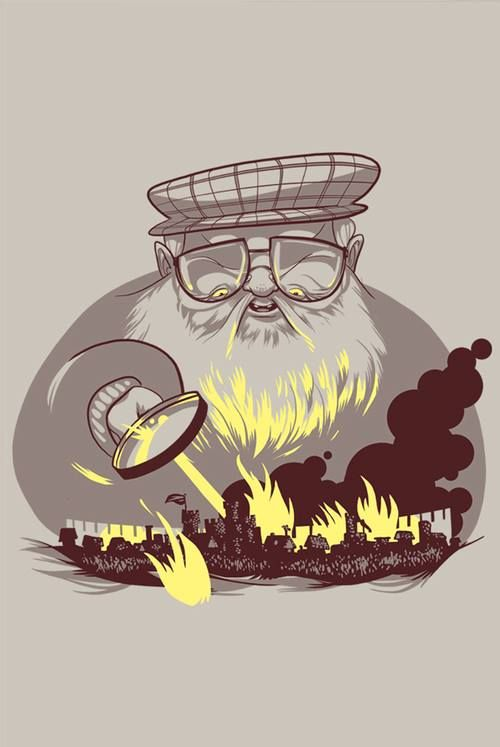

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **DateoFdeath**: дата смерти

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# ...
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
data = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [4]:
data.isna().sum().sum()

16780

In [5]:
data.isna().sum(axis=0)

name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64

In [6]:
data.isna().sum(axis=1)

S.No
1        7
2        6
3       11
4        7
5        6
        ..
1553    12
1554    13
1555    12
1556     9
1557    10
Length: 1557, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

In [8]:
# удалим колонки с максимальным количеством пропусков
# так как в них практически нет указаных значений и они не подлежат восстановлению

data.drop(['mother', 'father', 'heir',
            'isAliveMother', 'isAliveFather', 'isAliveHeir',
            'isAliveSpouse', 'spouse', 'dateOfBirth',
            'age'], axis = 1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   house             1176 non-null   object 
 5   book1             1557 non-null   int64  
 6   book2             1557 non-null   int64  
 7   book3             1557 non-null   int64  
 8   book4             1557 non-null   int64  
 9   book5             1557 non-null   int64  
 10  isMarried         1557 non-null   int64  
 11  isNoble           1557 non-null   int64  
 12  numDeadRelations  1557 non-null   int64  
 13  popularity        1557 non-null   float64
 14  isAlive           1557 non-null   int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 194.6+ KB


In [9]:
from collections import Counter
Counter(data.title).most_common()[:2]

[(nan, 840), ('Ser', 306)]

In [10]:
Counter(data.house).most_common()[:2]

[(nan, 381), ('House Frey', 89)]

In [11]:
Counter(data.culture).most_common()[:2]

[(nan, 1069), ('Northmen', 94)]

In [12]:
# заполним пропуски в колонках title, house самым популярным значением
data['title'].fillna('Ser', inplace=True)
data['house'].fillna('House Frey', inplace=True)
data['culture'].fillna('Northmen', inplace=True)
data.isna().sum().sum()

0

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [13]:
# isPopular
for i in range(1, len(data)+1):
    if data.loc[i, 'popularity'] <= 0.5: data.loc[i, 'popularity'] = 0
    else: data.loc[i, 'popularity'] = 1
Counter(data.popularity.values)

Counter({0.0: 1530, 1.0: 27})

In [14]:
data.columns = data.columns.str.replace('popularity', 'isPopular')
data.columns

Index(['name', 'title', 'male', 'culture', 'house', 'book1', 'book2', 'book3',
       'book4', 'book5', 'isMarried', 'isNoble', 'numDeadRelations',
       'isPopular', 'isAlive'],
      dtype='object')

In [15]:
# boolDeadRelations
for i in range(1, len(data)+1):
    if data.loc[i, 'numDeadRelations'] == 0: data.loc[i, 'numDeadRelations'] = 0
    else: data.loc[i, 'numDeadRelations'] = 1
Counter(data.numDeadRelations.values)

Counter({0: 1488, 1: 69})

In [16]:
data.columns = data.columns.str.replace('numDeadRelations', 'boolDeadRelations')
data.columns

Index(['name', 'title', 'male', 'culture', 'house', 'book1', 'book2', 'book3',
       'book4', 'book5', 'isMarried', 'isNoble', 'boolDeadRelations',
       'isPopular', 'isAlive'],
      dtype='object')

In [17]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [18]:
len(set(data.culture))

51

In [19]:
# culture
for i in cult:
    data['culture'] = data['culture'].replace(cult[i], i)
len(set(data.culture))

48

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [20]:
# удалим только 'name', т.к. остальные признаки могут иметь значение, либо уже были удалены ранее
data.drop(columns=['name'], inplace = True)
data.head(3)

,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,boolDeadRelations,isPopular,isAlive
S.No,,,,,,,,,,,,,,
1,Ser,1,Northmen,House Frey,0,0,0,0,0,0,0,1,1.0,0
2,Lord of the Crossing,1,Rivermen,House Frey,1,1,1,1,1,1,1,1,1.0,1
3,Ser,1,Northmen,House Swyft,0,0,0,1,0,0,1,0,0.0,1


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

Counter({1: 1212, 0: 345})


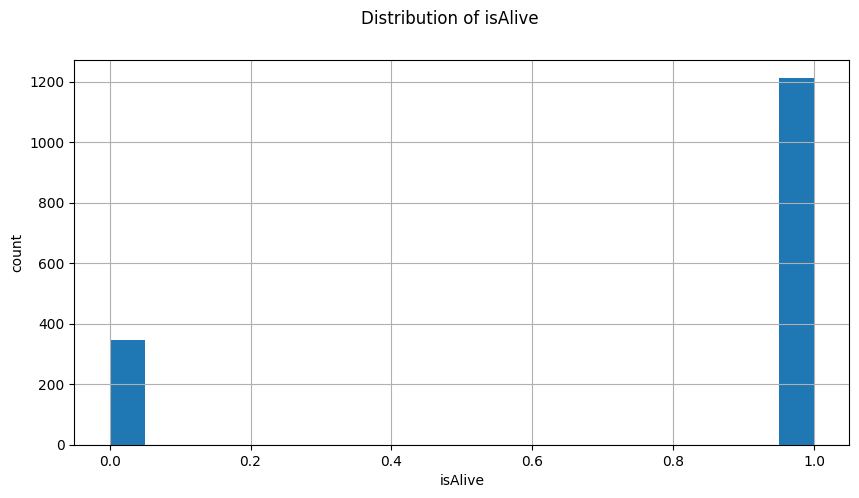

In [21]:
plt.figure(figsize = (10, 5))

data['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('isAlive')

plt.suptitle('Distribution of isAlive')
print(Counter(data['isAlive']))
plt.show()

In [22]:
# обнаружен сильный перекос в распределении классов
# для решения данной проблемы посчитаем веса классов и применим их во время обучения

import numpy as np
from sklearn.utils.class_weight import compute_class_weight
weights = class_weights = compute_class_weight('balanced', classes=np.unique(data.isAlive), y=data.isAlive)
weights

array([2.25652174, 0.64232673])

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [23]:
data.columns

Index(['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3', 'book4',
       'book5', 'isMarried', 'isNoble', 'boolDeadRelations', 'isPopular',
       'isAlive'],
      dtype='object')

In [24]:
# категориальные признаки
categorical_columns = ['title', 'male', 'culture','book1', 'book2', 'book3', 'book4',
       'book5', 'isPopular', 'boolDeadRelations', 'isMarried', 'isNoble', 'house']

In [25]:
categorical_features = data[categorical_columns]

In [26]:
categorical_features.columns

Index(['title', 'male', 'culture', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isPopular', 'boolDeadRelations', 'isMarried', 'isNoble', 'house'],
      dtype='object')

In [27]:
categorical_features

,title,male,culture,book1,book2,book3,book4,book5,isPopular,boolDeadRelations,isMarried,isNoble,house
S.No,,,,,,,,,,,,,
1,Ser,1,Northmen,0,0,0,0,0,1.0,1,0,0,House Frey
2,Lord of the Crossing,1,Rivermen,1,1,1,1,1,1.0,1,1,1,House Frey
3,Ser,1,Northmen,0,0,0,1,0,0.0,0,0,1,House Swyft
4,Queen,0,Northmen,0,0,0,0,0,0.0,0,1,1,House Arryn
5,Greenstone,0,Dornish,0,0,0,1,0,0.0,0,1,1,House Santagar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Archmaester,1,Northmen,1,0,1,1,0,0.0,0,0,1,House Frey
1554,Ser,0,Northmen,1,1,0,0,0,0.0,0,0,0,House Frey
1555,Ser,1,Northmen,0,1,1,1,1,0.0,0,0,0,House Seaworth


In [28]:
unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()
unprocessed_cat_features

['title', 'culture', 'house']

In [29]:
data[unprocessed_cat_features]

,title,culture,house
S.No,,,
1,Ser,Northmen,House Frey
2,Lord of the Crossing,Rivermen,House Frey
3,Ser,Northmen,House Swyft
4,Queen,Northmen,House Arryn
5,Greenstone,Dornish,House Santagar
...,...,...,...
1553,Archmaester,Northmen,House Frey
1554,Ser,Northmen,House Frey
1555,Ser,Northmen,House Seaworth


In [30]:
data = pd.get_dummies(data, prefix=unprocessed_cat_features)
data

,male,book1,book2,book3,book4,book5,isMarried,isNoble,boolDeadRelations,isPopular,...,house_R'hllor,house_Sea watch,house_Second Sons,house_Stone Crows,house_Stormcrows,house_Summer Islands,house_The Citadel,house_Windblown,house_Wise Masters,house_wildling
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,1,1.0,...,False,False,False,False,False,False,False,False,False,False
2,1,1,1,1,1,1,1,1,1,1.0,...,False,False,False,False,False,False,False,False,False,False
3,1,0,0,0,1,0,0,1,0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,0,0,0,0,0,0,1,1,0,0.0,...,False,False,False,False,False,False,False,False,False,False
5,0,0,0,0,1,0,1,1,0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,1,0,1,1,0,0,1,0,0.0,...,False,False,False,False,False,False,False,False,False,False
1554,0,1,1,0,0,0,0,0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
1555,1,0,1,1,1,1,0,0,0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [31]:
# числовых признаков у нас нет, следовательно выводим датасет
data.sample(5)

,male,book1,book2,book3,book4,book5,isMarried,isNoble,boolDeadRelations,isPopular,...,house_R'hllor,house_Sea watch,house_Second Sons,house_Stone Crows,house_Stormcrows,house_Summer Islands,house_The Citadel,house_Windblown,house_Wise Masters,house_wildling
S.No,,,,,,,,,,,,,,,,,,,,,
986,0,0,1,1,1,0,0,0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
1299,0,0,1,1,1,1,0,0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
188,0,0,0,0,1,0,0,0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
937,0,1,0,0,0,0,1,1,0,0.0,...,False,False,False,False,False,False,False,False,False,False
804,0,0,0,0,1,0,0,1,0,0.0,...,False,False,False,False,False,False,False,False,False,False


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

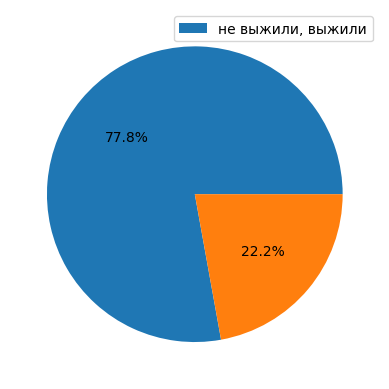

In [72]:
# Строим круговую диаграмму
plt.pie(data['isAlive'].value_counts(), autopct='%1.1f%%')

plt.legend(['не выжили, выжили'])

plt.show()

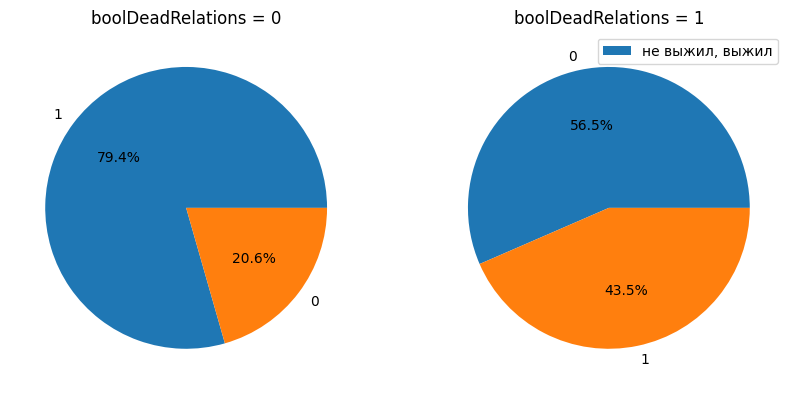

In [81]:
# Готовим данные для графика
data1 = data[data['boolDeadRelations'] == 0]['isAlive'].value_counts()
data2 = data[data['boolDeadRelations'] == 1]['isAlive'].value_counts()

# Строим круговую диаграмму
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("boolDeadRelations = 0")
ax2.set_title("boolDeadRelations = 1")

plt.legend(['не выжил, выжил'])

plt.show()

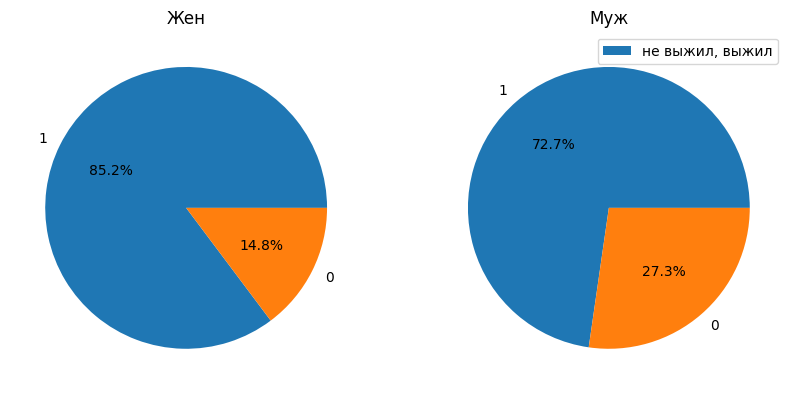

In [75]:
# Готовим данные для графика
data1 = data[data['male'] == 0]['isAlive'].value_counts()
data2 = data[data['male'] == 1]['isAlive'].value_counts()

# Строим круговую диаграмму
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("Жен")
ax2.set_title("Муж")

plt.legend(['не выжил, выжил'])

plt.show()

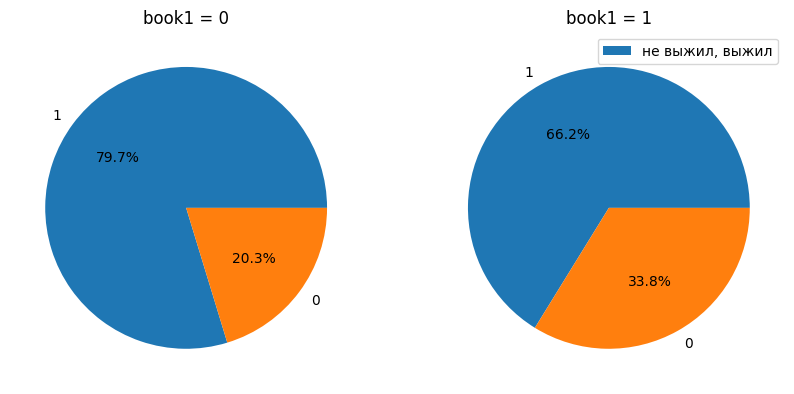

In [76]:
# Готовим данные для графика
data1 = data[data['book1'] == 0]['isAlive'].value_counts()
data2 = data[data['book1'] == 1]['isAlive'].value_counts()

# Строим круговую диаграмму
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("book1 = 0")
ax2.set_title("book1 = 1")

plt.legend(['не выжил, выжил'])

plt.show()

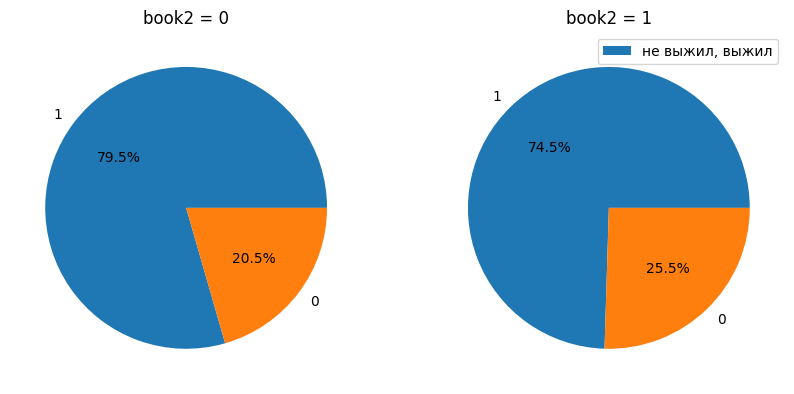

In [77]:
# Готовим данные для графика
data1 = data[data['book2'] == 0]['isAlive'].value_counts()
data2 = data[data['book2'] == 1]['isAlive'].value_counts()

# Строим круговую диаграмму
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("book2 = 0")
ax2.set_title("book2 = 1")

plt.legend(['не выжил, выжил'])

plt.show()

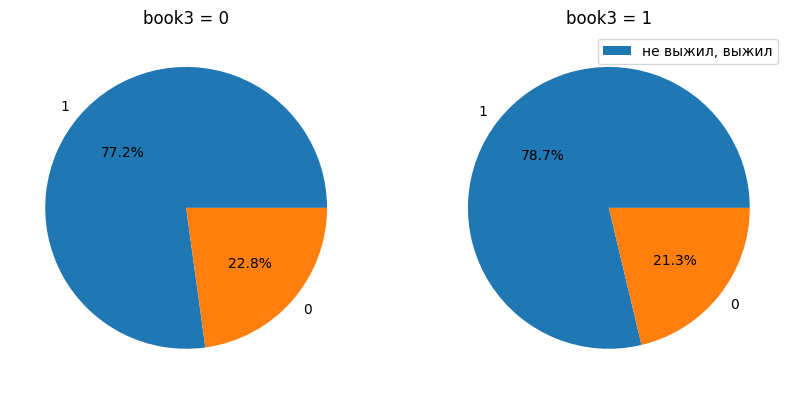

In [78]:
# Готовим данные для графика
data1 = data[data['book3'] == 0]['isAlive'].value_counts()
data2 = data[data['book3'] == 1]['isAlive'].value_counts()

# Строим круговую диаграмму
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("book3 = 0")
ax2.set_title("book3 = 1")

plt.legend(['не выжил, выжил'])

plt.show()

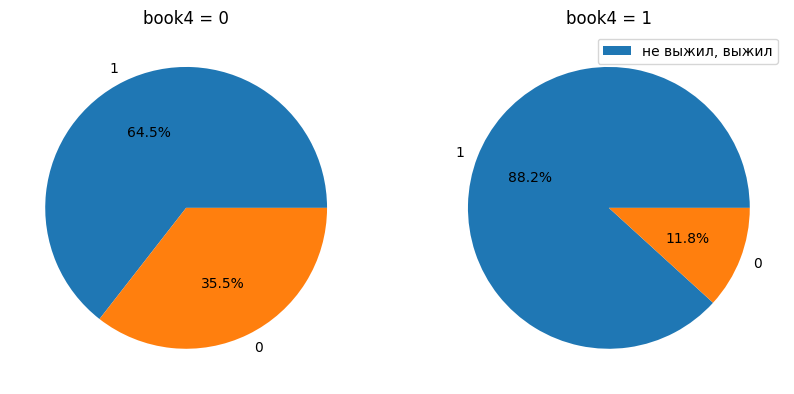

In [79]:
# Готовим данные для графика
data1 = data[data['book4'] == 0]['isAlive'].value_counts()
data2 = data[data['book4'] == 1]['isAlive'].value_counts()

# Строим круговую диаграмму
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("book4 = 0")
ax2.set_title("book4 = 1")

plt.legend(['не выжил, выжил'])

plt.show()

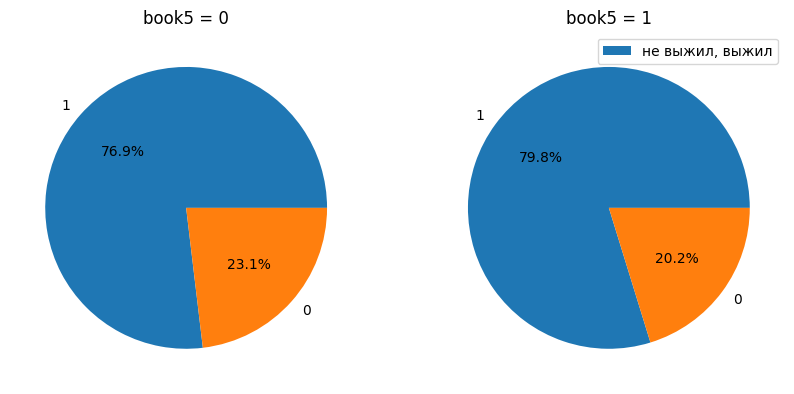

In [80]:
# Готовим данные для графика
data1 = data[data['book5'] == 0]['isAlive'].value_counts()
data2 = data[data['book5'] == 1]['isAlive'].value_counts()

# Строим круговую диаграмму
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("book5 = 0")
ax2.set_title("book5 = 1")

plt.legend(['не выжил, выжил'])

plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [33]:
X = data.drop(['isAlive'], axis = 1)
y = data.isAlive

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# используем параметр stratify, для равномерного распределения классов в тренировочной и тестовой выборках
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [36]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [37]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [38]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1, class_weight=dict(enumerate(weights)))

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [39]:
# Шаг 1. создание модели
rf = RandomForestClassifier(class_weight=dict(enumerate(weights)))

# Шаг 2. обучение модели
rf.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = rf.predict(X_test)

In [40]:
# Шаг 1. создание модели
ada_boost = AdaBoostClassifier()

# Шаг 2. обучение модели
ada_boost.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = ada_boost.predict(X_test)

In [41]:
# Шаг 1. создание модели
gp = GaussianProcessClassifier()

# Шаг 2. обучение модели
gp.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = gp.predict(X_test)

In [42]:
# Шаг 1. создание модели
gnb = GaussianNB()

# Шаг 2. обучение модели
gnb.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = gnb.predict(X_test)

In [43]:
# Шаг 1. создание модели
knn = KNeighborsClassifier()

# Шаг 2. обучение модели
knn.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = knn.predict(X_test)

In [44]:
# Шаг 1. создание модели
svc = SVC(class_weight=dict(enumerate(weights)))

# Шаг 2. обучение модели
svc.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = svc.predict(X_test)

In [45]:
# Шаг 1. создание модели
tree = DecisionTreeClassifier(class_weight=dict(enumerate(weights)))

# Шаг 2. обучение модели
tree.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = tree.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [46]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [47]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7374


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [48]:
# Шаг 3. Предсказание на тестовых данных
y_pred = rf.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7821


In [49]:
# Шаг 3. Предсказание на тестовых данных
y_pred = ada_boost.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7782


In [50]:
# Шаг 3. Предсказание на тестовых данных
y_pred = gp.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7879


In [51]:
# Шаг 3. Предсказание на тестовых данных
y_pred = gnb.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.4086


In [52]:
# Шаг 3. Предсказание на тестовых данных
y_pred = knn.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7899


In [53]:
# Шаг 3. Предсказание на тестовых данных
y_pred = svc.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7023


In [54]:
# Шаг 3. Предсказание на тестовых данных
y_pred = tree.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7198


Выберите лучшую модель.

In [55]:
# лучше всего себя показала модель "KNeighborsClassifier", проведем для нее подбор гиперпараметров

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

# визуализация валидационной выборки для обучения
ps = PredefinedSplit(test_fold=[-1 if i in X_train.index else 0 for i in X.index])

# реализация GridSearch
knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid={
        'n_neighbors': np.arange(1, 40),
        'weights': ['uniform', 'distance'],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'p' : np.arange(1, 6),
        'n_jobs': [-1]
    },
    scoring='f1',
    verbose=52,
    cv=ps,
    n_jobs=-1
)

In [56]:
knn.fit(X, y)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Fitting 1 folds for each of 1560 candidates, totalling 1560 fits
Accuracy : 0.8210


In [57]:
# accuracy не соответсвует желаемому, обучим GridSearch RandomForest

rf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        'n_estimators': [10, 25, 50, 100, 200, 250, 300, 500],
        'max_depth': [7, 8, 10, 20, 25, 30, None],
        'max_features': ['sqrt', 'log2'],
        'criterion': ['gini', 'entropy', 'log_loss'],
        'min_samples_split': [1, 2, 5, 7, 10, 15],
        'class_weight': [dict(enumerate(weights))],
        'n_jobs': [-1]
    },
    scoring='f1',
    verbose=52,
    cv=ps,
    n_jobs=-1
)

rf.fit(X, y)

Fitting 1 folds for each of 2016 candidates, totalling 2016 fits


GridSearchCV(cv=PredefinedSplit(test_fold=array([ 0,  0, ..., -1,  0])),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': [{0: 2.256521739130435,
                                           1: 0.6423267326732673}],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [7, 8, 10, 20, 25, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [1, 2, 5, 7, 10, 15],
                         'n_estimators': [10, 25, 50, 100, 200, 250, 300, 500],
                         'n_jobs': [-1]},
             scoring='f1', verbose=52)

In [58]:
rf.best_params_

{'class_weight': {0: 2.256521739130435, 1: 0.6423267326732673},
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 50,
 'n_jobs': -1}

In [59]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.9261


Это уже намного лучше, будем делать предикт с помощью данной модели

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [66]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [60]:
submission = pd.read_csv("submission.csv", index_col='S.No')
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [61]:
test = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')
test

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,1,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171
1943,Reek,NaN,1,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990
1944,Symeon Star-Eyes,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100


In [62]:
test.columns

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity'],
      dtype='object')

In [63]:
test.drop(['mother', 'father', 'heir',
            'isAliveMother', 'isAliveFather', 'isAliveHeir',
            'isAliveSpouse', 'spouse', 'dateOfBirth',
            'age'], axis = 1, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              389 non-null    object 
 1   title             221 non-null    object 
 2   male              389 non-null    int64  
 3   culture           189 non-null    object 
 4   house             343 non-null    object 
 5   book1             389 non-null    int64  
 6   book2             389 non-null    int64  
 7   book3             389 non-null    int64  
 8   book4             389 non-null    int64  
 9   book5             389 non-null    int64  
 10  isMarried         389 non-null    int64  
 11  isNoble           389 non-null    int64  
 12  numDeadRelations  389 non-null    int64  
 13  popularity        389 non-null    float64
dtypes: float64(1), int64(9), object(4)
memory usage: 45.6+ KB


In [64]:
test['title'].fillna('Ser', inplace=True)
test['house'].fillna('House Frey', inplace=True)
test['culture'].fillna('Northmen', inplace=True)
test.isna().sum().sum()

0

In [65]:
# isPopular
for i in range(1558, 1558+len(test)):
    if test.loc[i, 'popularity'] <= 0.5: test.loc[i, 'popularity'] = 0
    else: test.loc[i, 'popularity'] = 1

test.columns = test.columns.str.replace('popularity', 'isPopular')
test.columns

Index(['name', 'title', 'male', 'culture', 'house', 'book1', 'book2', 'book3',
       'book4', 'book5', 'isMarried', 'isNoble', 'numDeadRelations',
       'isPopular'],
      dtype='object')

In [66]:
# boolDeadRelations
for i in range(1558, 1558+len(test)):
    if test.loc[i, 'numDeadRelations'] == 0: test.loc[i, 'numDeadRelations'] = 0
    else: test.loc[i, 'numDeadRelations'] = 1

test.columns = test.columns.str.replace('numDeadRelations', 'boolDeadRelations')
test.columns

Index(['name', 'title', 'male', 'culture', 'house', 'book1', 'book2', 'book3',
       'book4', 'book5', 'isMarried', 'isNoble', 'boolDeadRelations',
       'isPopular'],
      dtype='object')

In [67]:
# culture
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

for i in cult:
    test['culture'] = test['culture'].replace(cult[i], i)
len(set(test.culture))

48

In [68]:
test.drop(columns=['name'], inplace = True)
test.head(3)

,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,boolDeadRelations,isPopular
S.No,,,,,,,,,,,,,
1558,Ser,0,Northmen,House Blackwood,0,0,0,0,1,0,0,0,0.0
1559,Ser,0,Asshai,R'hllor,0,1,1,1,1,0,0,0,1.0
1560,Ser,0,Northmen,Brotherhood without banners,0,0,1,1,0,0,0,0,0.0


In [69]:
test = pd.get_dummies(test, prefix=unprocessed_cat_features)
test

,male,book1,book2,book3,book4,book5,isMarried,isNoble,boolDeadRelations,isPopular,...,house_Night's Watch,house_R'hllor,house_Stone Crows,house_Stormcrows,house_Thenn,house_Thirteen,house_Three-eyed crow,house_Undying Ones,house_Unsullied,house_brotherhood without banners
S.No,,,,,,,,,,,,,,,,,,,,,
1558,0,0,0,0,0,1,0,0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
1559,0,0,1,1,1,1,0,0,0,1.0,...,False,True,False,False,False,False,False,False,False,False
1560,0,0,0,1,1,0,0,0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
1561,1,1,1,1,1,1,0,1,0,0.0,...,False,False,False,False,False,False,False,False,False,False
1562,1,1,1,1,1,1,1,0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,1,1,1,1,1,1,0,0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
1943,1,0,1,0,1,1,0,0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
1944,1,1,1,1,1,1,0,0,0,0.0,...,False,False,False,False,False,False,False,False,False,False


Делаем предикт нашей модели на тесте

In [70]:
pred = rf.predict(test)
pred

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- culture_Asshai
- culture_Asshai'i
- culture_Astapor
- culture_Ibbenese
- culture_Meereen
- ...
Feature names seen at fit time, yet now missing:
- culture_Andal
- culture_Andals
- culture_Astapori
- culture_Braavos
- culture_Ghiscaricari
- ...


In [87]:
submission['isAlive'] = pred
submission

,isAlive
S.No,
1558,1
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [89]:
submission.to_csv("new_submission.csv", index=False)